<a href="https://colab.research.google.com/github/mohmaed7777/DecisionTress-for-Brain-Strokes-Predictions/blob/main/Decision_Trees_classifier_to_predict_Brain_Strokes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Attribute Information:**



According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.
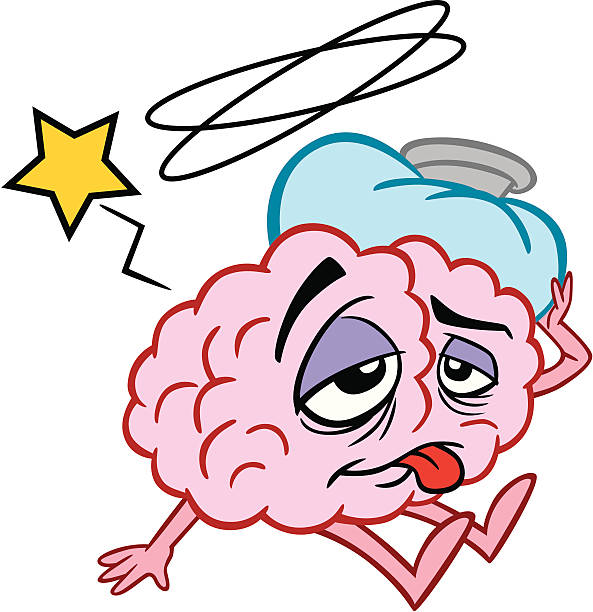


1) **gender**: 
"Male", "Female" or "Other"

2) **age**: age of the patient

3) **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

4) **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

5) **ever_married**: "No" or "Yes"

6) **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

7)**Residence_type**: "Rural" or "Urban"

8) **avg_glucose_level**: average glucose level in blood

9) **bmi**: body mass index

10) **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*

11) **stroke**: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn  as sns 
import sklearn 
%matplotlib inline 
sns.set()
pd.plotting.register_matplotlib_converters()
print('Setup Complete!')

Setup Complete!


In [10]:
data_path = '/content/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(data_path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**EDA and preprocessing:**

In [11]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [12]:
df.dtypes.value_counts()

object     5
int64      4
float64    3
dtype: int64

In [13]:
# Check if the data are all scaled with -1 for minmum values and +1 for maximum values: 
df.iloc[:, :-1].min().value_counts()

0           2
Rural       1
Govt_job    1
10.3        1
Unknown     1
55.12       1
Female      1
67          1
No          1
0.08        1
dtype: int64

In [14]:
df.iloc[:, :-1].max().value_counts()

1           2
Urban       1
smokes      1
children    1
72940       1
271.74      1
97.6        1
Yes         1
82.0        1
Other       1
dtype: int64

In [15]:
# Dropout any column that at least has one missing value
df.drop(['id', 'bmi'], axis=1, inplace=True)

In [16]:
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


**Encode the categorical variables:**

In [17]:
df_uniques = df.nunique()
df_uniques

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
smoking_status          4
stroke                  2
dtype: int64

In [18]:
binary_vals = list(df_uniques[df_uniques == 2].index)
binary_vals

['hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'stroke']

In [19]:
df[binary_vals].dtypes

hypertension       int64
heart_disease      int64
ever_married      object
Residence_type    object
stroke             int64
dtype: object

In [20]:
categorical_vals  = list(df_uniques[(df_uniques > 2) & (df_uniques <=6)].index)
categorical_vals

['gender', 'work_type', 'smoking_status']

In [21]:
[[i, list(df[i].unique())] for i in categorical_vals]

[['gender', ['Male', 'Female', 'Other']],
 ['work_type',
  ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']],
 ['smoking_status', ['formerly smoked', 'never smoked', 'smokes', 'Unknown']]]

In [22]:
numaric_vals = list(set(df.columns) - set(categorical_vals)- set(binary_vals))
numaric_vals

['avg_glucose_level', 'age']

**Encoding process:**

In [23]:

from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

In [24]:
lb, le, lo = LabelBinarizer(), LabelEncoder(), OrdinalEncoder()

In [25]:
for col in categorical_vals: 
  df[col] = le.fit_transform(df[col])

In [26]:
for col in binary_vals:
  df[col] = lb.fit_transform(df[col])

In [27]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,1,1
1,0,61.0,0,0,1,3,0,202.21,2,1
2,1,80.0,0,1,1,2,0,105.92,2,1
3,0,49.0,0,0,1,2,1,171.23,3,1
4,0,79.0,1,0,1,3,0,174.12,2,1


In [28]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
gender,5110.0,0.41,0.49,0.00,0.00,0.00,1.00,2.00
age,5110.0,43.23,22.61,0.08,25.00,45.00,61.00,82.00
hypertension,5110.0,0.10,0.30,0.00,0.00,0.00,0.00,1.00
heart_disease,5110.0,0.05,0.23,0.00,0.00,0.00,0.00,1.00
ever_married,5110.0,0.66,0.48,0.00,0.00,1.00,1.00,1.00
work_type,5110.0,2.17,1.09,0.00,2.00,2.00,3.00,4.00
Residence_type,5110.0,0.51,0.50,0.00,0.00,1.00,1.00,1.00
avg_glucose_level,5110.0,106.15,45.28,55.12,77.24,91.88,114.09,271.74
smoking_status,5110.0,1.38,1.07,0.00,0.00,2.00,2.00,3.00
stroke,5110.0,0.05,0.22,0.00,0.00,0.00,0.00,1.00


In [29]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

**Data Presention:-**

[Text(0, 0.5, 'Frequncy'),
 Text(0.5, 0, 'Class distribution of 249 patient had a stroke and 4861 haven not been diagnosed with stroke '),
 Text(0.5, 1.0, 'Brain Stroke')]

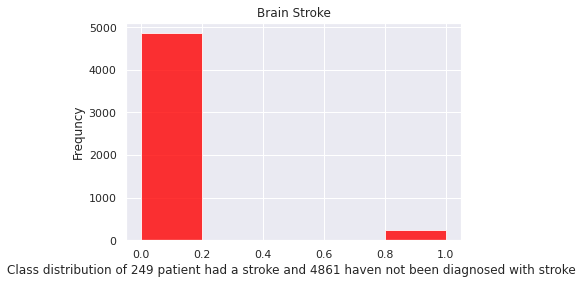

In [30]:
# create a histogram: 

ax = plt.axes()
ax.hist(df.stroke, bins=5, alpha=0.8, color='red')
ax.set(xlabel='Class distribution of 249 patient had a stroke and 4861 haven not been diagnosed with stroke ',
       ylabel='Frequncy',
       title='Brain Stroke')

In [31]:
# Create Feature columns : 
features_col = [x for x in df.columns if x not in 'stroke']
features_col

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'smoking_status']

In [32]:
df[features_col]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status
0,1,67.0,0,1,1,2,1,228.69,1
1,0,61.0,0,0,1,3,0,202.21,2
2,1,80.0,0,1,1,2,0,105.92,2
3,0,49.0,0,0,1,2,1,171.23,3
4,0,79.0,1,0,1,3,0,174.12,2
...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,2
5106,0,81.0,0,0,1,3,1,125.20,2
5107,0,35.0,0,0,1,3,0,82.99,2
5108,1,51.0,0,0,1,2,0,166.29,1


**Train Test Split:**

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit

In [34]:
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=1000, random_state=42)

In [35]:
# Get the index values from the genetor: 
train_index , test_index = next(strat_shuff_split.split(df[features_col], df['stroke']))

In [36]:
# Create the datasets : 
x_train = df.loc[train_index, features_col]
y_train = df.loc[train_index, 'stroke']
x_test = df.loc[test_index, features_col]
y_test = df.loc[test_index, 'stroke']

In [37]:
# Checking the perentage compistion of each level in the train and test sets: 
y_train.value_counts(normalize=True).sort_index()

0    0.951338
1    0.048662
Name: stroke, dtype: float64

In [38]:
y_test.value_counts(normalize=True).sort_index()

0    0.951
1    0.049
Name: stroke, dtype: float64

In [39]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,3.000000,1.000000


**1/Applying KNN algorithm:-**

In [40]:
# Estimate Knn model and report the outcome : 
from sklearn.neighbors import KNeighborsClassifier

In [41]:

knn = KNeighborsClassifier(n_neighbors=13)


In [42]:
# Train the model :
knn = knn.fit(x_train, y_train)

In [43]:
y_pred = knn.predict(x_test)
y_pred[:5]

array([0, 0, 0, 0, 0])

**Model Validation and Accuracy:**

In [44]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.049

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.951

#**Applying Decision Trees Classifier:-**

**1/ Fit a decision tree classifier with NO set limits on maximum depth features and leaves.**

**2/ Determine how many nodes are present and what the depth of this (very large) tree is?.**

**3/ Using this tree to measure the predication error in the train and test dataset.**

In [46]:
from sklearn.tree import DecisionTreeClassifier 

In [47]:
# Create the model 
dt = DecisionTreeClassifier(random_state=42)

In [48]:
# Fit the model
dt = dt.fit(x_train, y_train)

In [49]:
# Determine the number of nodes and maximum depth:
dt.tree_.node_count, dt.tree_.max_depth

(657, 18)

**Identify the Error Metrics:**

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [68]:
def measure_error(y_true, y_pred, label):
  return pd.Series({'accuracy': accuracy_score(y_true, y_pred),
                    'precision': precision_score(y_true, y_pred),
                    'recall': recall_score(y_true, y_pred),
                    'f1': f1_score(y_true, y_pred)},
                   name=label)

In [69]:
# This step may lead to overfitting because we did not prune the tree:
y_train_pred = dt.predict(x_train)


In [70]:
y_test_pred = dt.predict(x_test)

In [71]:
y_test_pred[:5]

array([0, 0, 0, 0, 0])

**Check the model accuracy and error measurement:-**

Note ==> The maximum depth of leaves for the model above has not been declared. 

In [72]:
train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                   measure_error(y_test, y_test_pred,'test')],axis=1)

In [73]:
train_test_full_error

,train,test
accuracy,1.0,0.915000
precision,1.0,0.166667
recall,1.0,0.183673
f1,1.0,0.174757


**//Using grid search with cross validation to find a decision Tree that perform well on the train and test sets//:-**

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1,2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid = param_grid,
                  scoring = 'accuracy',
                  n_jobs = -1)              

In [76]:
# Fit the Grid Search model: 
GR = GR.fit(x_train, y_train)

In [77]:
# Get the number of the nodes and Maximmum Depth: 
GR.best_estimator_.tree_.node_count , GR.best_estimator_.tree_.max_depth

(3, 1)

In [79]:
# Make predication: 
y_train_pred_gr = GR.predict(x_train)
y_train_pred_gr[:]

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
y_test_pred_gr = GR.predict(x_test)
y_test_pred_gr[:5]

array([0, 0, 0, 0, 0])

**Check the GR model accuracy and error measurement:-**

Note : Here we use the fixed amount of nodes and the maximum depth is known 

In [82]:
train_test_full_error_gr = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                   measure_error(y_test, y_test_pred_gr,'test')],axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
train_test_full_error_gr

,train,test
accuracy,0.951338,0.951
precision,0.000000,0.000
recall,0.000000,0.000
f1,0.000000,0.000
